In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
sns.set_style("white")

In [4]:
date = '20190716'
percentage = '0'
path_rel_mentions = f'../../data/director_mentions/slice_data/{percentage}'
path_top_mentions = f'../../data/director_mentions'

### Mentions in 2018 only

### Top directors

In [4]:
male_top_deadline = pd.read_csv(f'{path_top_mentions}/male_fame_top_deadline_20190707.txt', sep = ',',\
                               header = None, names = ['count', 'name'])
male_top_deadline = male_top_deadline.sort_values(by='count', ascending = False)
female_top_deadline = pd.read_csv(f'{path_top_mentions}/female_fame_top_deadline_20190707.txt', sep = ',',\
                               header = None, names = ['count', 'name'])

In [5]:
male_top_hollywood_reporter = pd.read_csv(f'{path_top_mentions}/male_fame_top_hollywood_reporter_20190707.txt', sep = ',',\
                               header = None, names = ['count', 'name'])
female_top_hollywood_reporter = pd.read_csv(f'{path_top_mentions}/female_fame_top_hollywood_reporter_20190707.txt', sep = ',',\
                               header = None, names = ['count', 'name'])

In [6]:
male_top_variety = pd.read_csv(f'{path_top_mentions}/male_fame_top_variety_20190707.txt', sep = ',',\
                               header = None, names = ['count', 'name'])
female_top_variety = pd.read_csv(f'{path_top_mentions}/female_fame_top_variety_20190707.txt', sep = ',',\
                               header = None, names = ['count', 'name'])

#### Deadline top

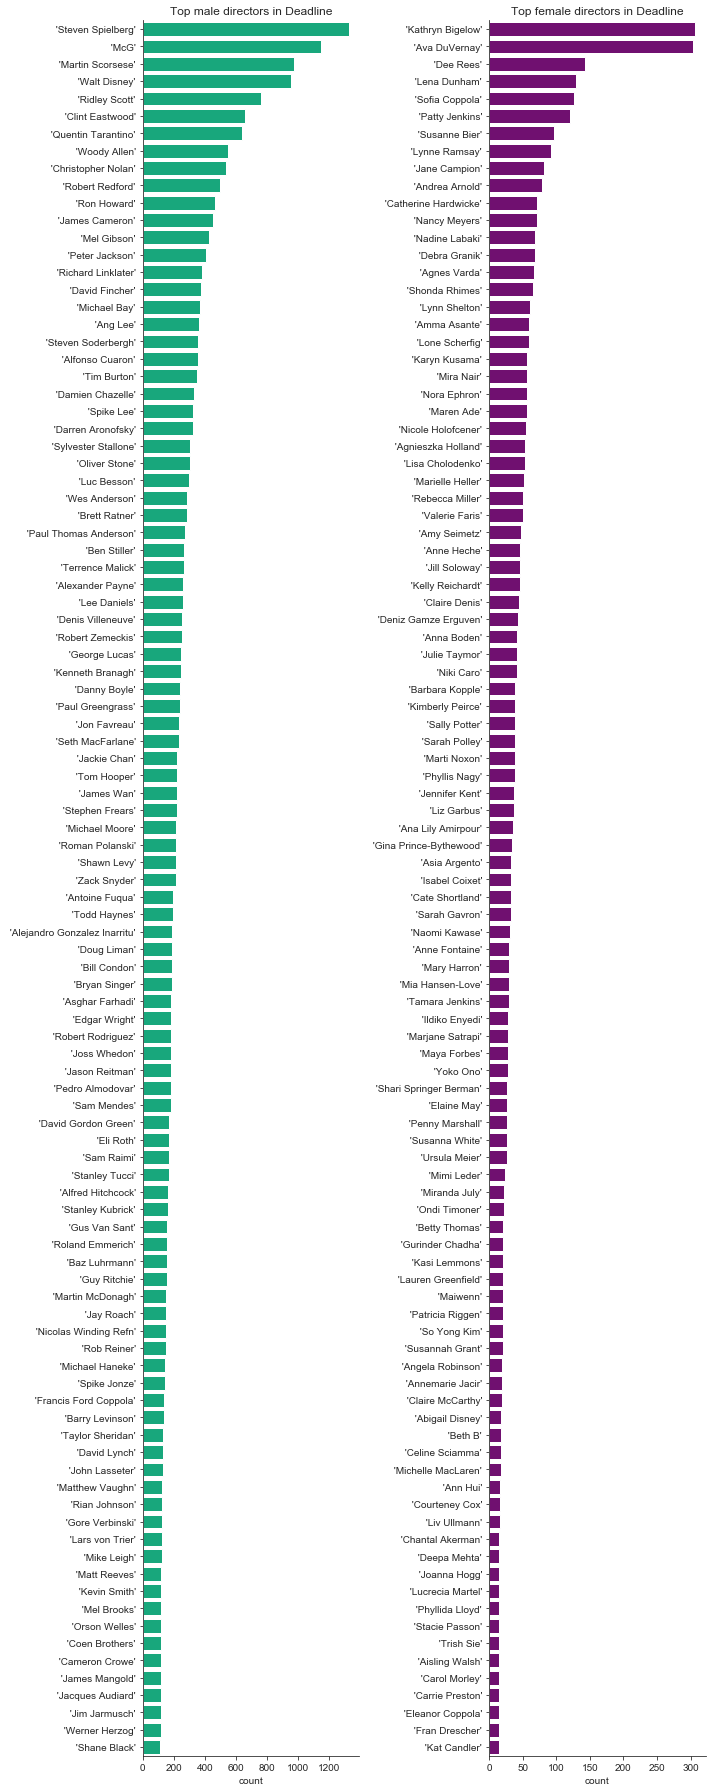

In [18]:
plt.figure(figsize=(10,25))

plt.subplot(1,2,1)
sns.barplot(x='count', y='name', data = male_top_deadline.head(100), color = '#00BF85')
plt.title('Top male directors in Deadline')
plt.ylabel(None)

plt.subplot(1,2,2)
sns.barplot(x='count', y='name', data = female_top_deadline.head(100), color = 'purple')
plt.title('Top female directors in Deadline')
plt.ylabel(None)

plt.tight_layout()
sns.despine()
plt.savefig('top_directors_deadline.png', dpi=300, format='png')
plt.show()

#### Variety top

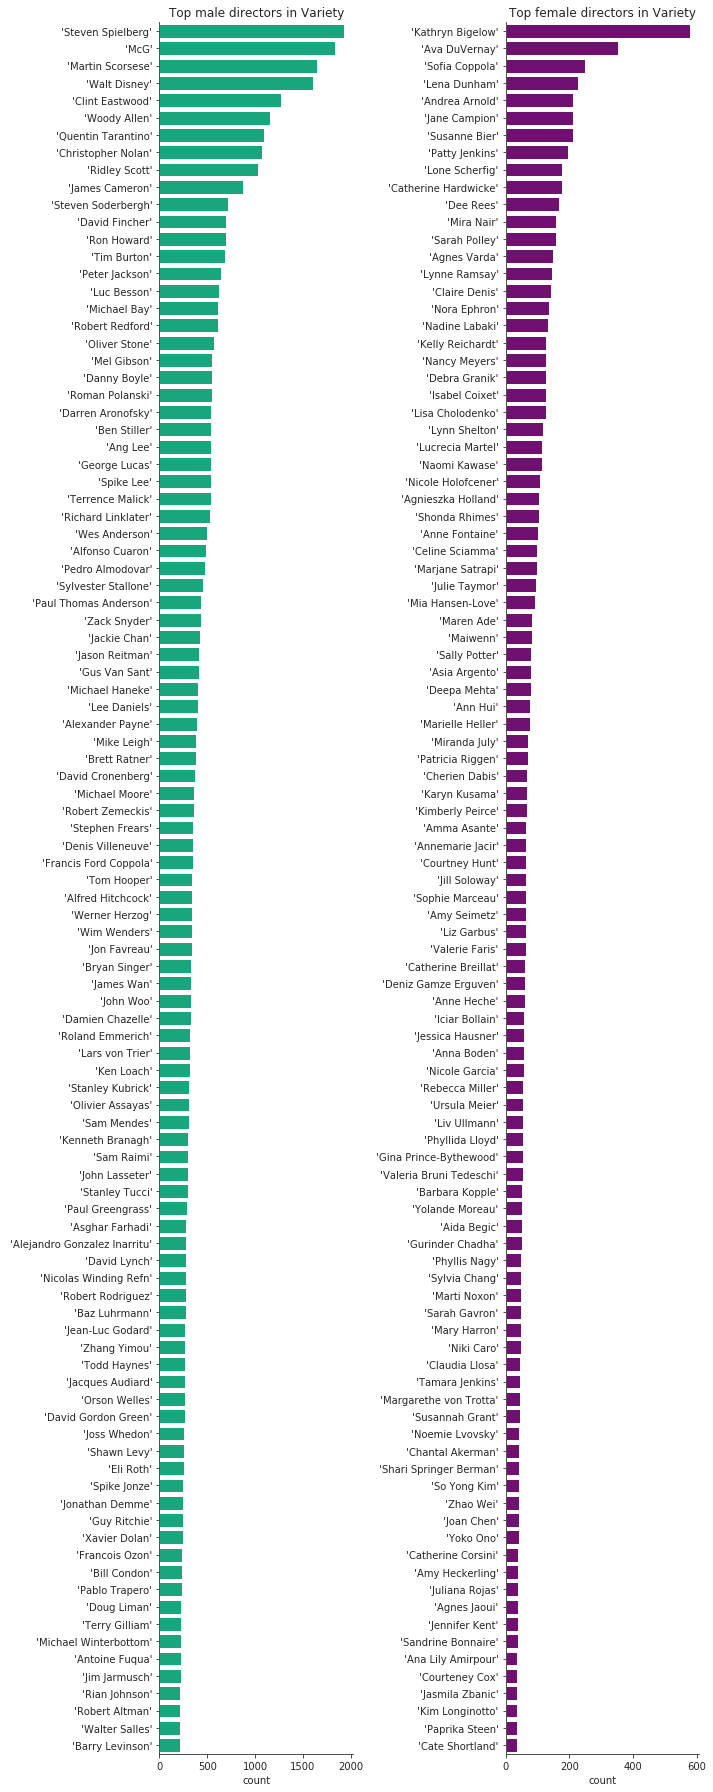

In [62]:
plt.figure(figsize=(10,25))

plt.subplot(1,2,1)
sns.barplot(x='count', y='name', data = male_top_variety.head(100), color = '#00BF85')
plt.title('Top male directors in Variety')
plt.ylabel(None)

plt.subplot(1,2,2)
sns.barplot(x='count', y='name', data = female_top_variety.head(100), color = 'purple')
plt.title('Top female directors in Variety')
plt.ylabel(None)

plt.tight_layout()
sns.despine()
plt.savefig('top_directors_variety.png', dpi=300, format='png')
plt.show()

#### Hollywood reporter top

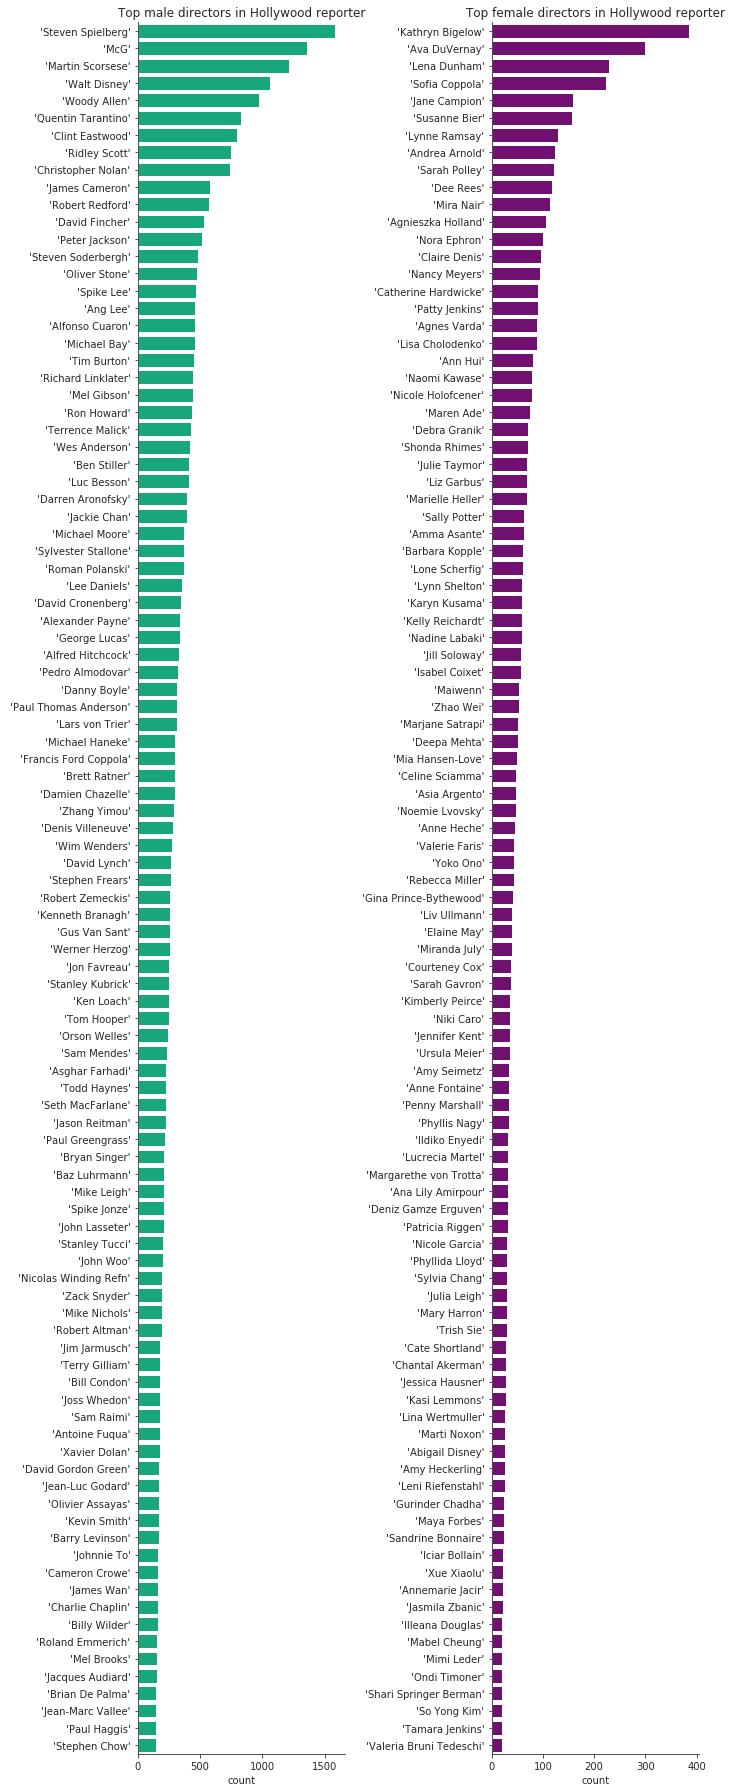

In [63]:
plt.figure(figsize=(10,25))

plt.subplot(1,2,1)
sns.barplot(x='count', y='name', data = male_top_hollywood_reporter.head(100), color = '#00BF85')
plt.title('Top male directors in Hollywood reporter')
plt.ylabel(None)

plt.subplot(1,2,2)
sns.barplot(x='count', y='name', data = female_top_hollywood_reporter.head(100), color = 'purple')
plt.title('Top female directors in Hollywood reporter')
plt.ylabel(None)

plt.tight_layout()
sns.despine()
plt.savefig('top_directors_hollywood_reporter.png', dpi=300, format='png')
plt.show()

# Relative mention per year

In [65]:
month = {
    1:'январь',
    2:'февраль',
    3:'март',
    4:'апрель',
    5:'май',
    6:'июнь',
    7:'июль',
    8:'август',
    9:'сентябрь',
    10:'октябрь',
    11:'ноябрь',
    12:'декабрь',
}

In [77]:
female_deadline_month = pd.read_csv(f'{path_rel_mentions}/female_mentions_per_month_deadline_{date}.txt', sep = ' ', header = None, names = ['year', 'month', 'count'])
female_deadline_month['date'] = female_deadline_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
female_deadline_month = female_deadline_month.sort_values(by='date')
female_deadline_month = female_deadline_month.loc[female_deadline_month['date'] > datetime.date(year=2011,month=1,day=1)]
female_deadline_month['date'] = female_deadline_month['date'].apply(lambda x: month[x.month]+'\n'+str(x.year))

male_deadline_month = pd.read_csv(f'{path_rel_mentions}/male_mentions_per_month_deadline_{date}.txt', sep = ' ', header = None, names = ['year', 'month', 'count'])
male_deadline_month['date'] = male_deadline_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
male_deadline_month = male_deadline_month.sort_values(by='date')
male_deadline_month = male_deadline_month.loc[male_deadline_month['date'] > datetime.date(year=2011,month=1,day=1)]
male_deadline_month['date'] = male_deadline_month['date'].apply(lambda x: month[x.month]+'\n'+str(x.year))

deadline_month = male_deadline_month.merge(female_deadline_month, on = 'date', suffixes = ('_male', '_female'))
deadline_month['total'] = deadline_month.apply(lambda x: x[2] + x[-1], axis = 1)

In [93]:
female_hwr_month = pd.read_csv(f'{path_rel_mentions}/female_mentions_per_month_hollywood_reporter_{date}.txt', sep=' ', header = None, names = ['year', 'month', 'count'])
female_hwr_month['date'] = female_hwr_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
female_hwr_month = female_hwr_month.sort_values(by='date')
female_hwr_month = female_hwr_month.loc[female_hwr_month['date'] > datetime.date(year=2011,month=1,day=1)]
female_hwr_month['date'] = female_hwr_month['date'].apply(lambda x: month[x.month]+'\n'+str(x.year))

male_hwr_month = pd.read_csv(f'{path_rel_mentions}/male_mentions_per_month_hollywood_reporter_{date}.txt', sep=' ', header = None, names = ['year', 'month', 'count'])
male_hwr_month['date'] = male_hwr_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
male_hwr_month = male_hwr_month.sort_values(by='date')
male_hwr_month = male_hwr_month.loc[male_hwr_month['date'] > datetime.date(year=2011,month=1,day=1)]
male_hwr_month['date'] = male_hwr_month['date'].apply(lambda x: month[x.month]+'\n'+str(x.year))

hwr_month = male_hwr_month.merge(female_hwr_month, on = 'date', suffixes = ('_male', '_female'))
hwr_month['total'] = hwr_month.apply(lambda x: x[2] + x[-1], axis = 1)

In [94]:
female_variety_month = pd.read_csv(f'{path_rel_mentions}/female_mentions_per_month_variety_{date}.txt', sep=' ', header = None, names = ['year', 'month', 'count'])
female_variety_month['date'] = female_variety_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
female_variety_month = female_variety_month.sort_values(by='date')
female_variety_month = female_variety_month.loc[female_variety_month['date'] > datetime.date(year=2011,month=1,day=1)]
female_variety_month['date'] = female_variety_month['date'].apply(lambda x: month[x.month]+'\n'+str(x.year))

male_variety_month = pd.read_csv(f'{path_rel_mentions}/male_mentions_per_month_variety_{date}.txt', sep=' ', header = None, names = ['year', 'month', 'count'])
male_variety_month['date'] = male_variety_month.apply(lambda x: datetime.date(year=int(x[0]), month=int(x[1]), day=1), axis =1)
male_variety_month = male_variety_month.sort_values(by='date')
male_variety_month = male_variety_month.loc[male_variety_month['date'] > datetime.date(year=2011,month=1,day=1)]
male_variety_month['date'] = male_variety_month['date'].apply(lambda x: month[x.month]+'\n'+str(x.year))

variety_month = male_variety_month.merge(female_variety_month, on = 'date', suffixes = ('_male', '_female'))
variety_month['total'] = variety_month.apply(lambda x: x[2] + x[-1], axis = 1)

In [71]:
deadline_year = deadline_month.groupby(['year_male'], as_index=False).sum() #from 2011
hwr_year = hwr_month.groupby(['year_male'], as_index=False).sum() #from 2011
variety_year = variety_month.groupby(['year_male'], as_index=False).sum() #from 2011

deadline_year['fem_year_relative'] = deadline_year.apply(lambda x: x[5]/x[6], axis = 1)
deadline_year['male_year_relative'] = deadline_year.apply(lambda x: x[2]/x[6], axis = 1)

variety_year['fem_year_relative'] = variety_year.apply(lambda x: x[5]/x[6], axis = 1)
variety_year['male_year_relative'] = variety_year.apply(lambda x: x[2]/x[6], axis = 1)

hwr_year['fem_year_relative'] = hwr_year.apply(lambda x: x[5]/x[6], axis = 1)
hwr_year['male_year_relative'] = hwr_year.apply(lambda x: x[2]/x[6], axis = 1)

deadline_year
#variety_year
#hwr_year

,year_male,month_male,count_male,year_female,month_female,count_female,total,fem_year_relative,male_year_relative
0,2011,77,3196,22121,77,298,3494,0.085289,0.914711
1,2012,78,5009,24144,78,603,5612,0.107448,0.892552
2,2013,78,5653,24156,78,641,6294,0.101843,0.898157
3,2014,78,5267,24168,78,548,5815,0.094239,0.905761
4,2015,78,5240,24180,78,685,5925,0.115612,0.884388
5,2016,78,5657,24192,78,807,6464,0.124845,0.875155
6,2017,78,5966,24204,78,1036,7002,0.147958,0.852042
7,2018,78,5454,24216,78,1267,6721,0.188514,0.811486


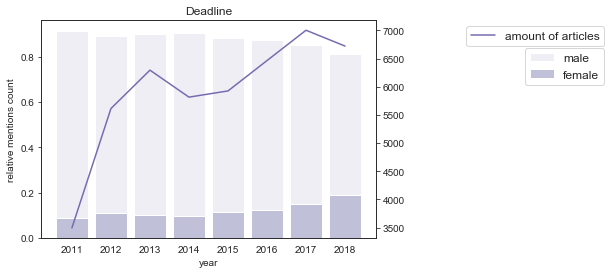

In [51]:
ax = sns.barplot(x='year_male', y='male_year_relative', data = deadline_year, color = '#efedf5', label = 'male')
sns.barplot(x='year_male', y='fem_year_relative', data = deadline_year, color = '#bcbddc', label = 'female')
ax.set(xlabel='year', ylabel='relative mentions count')
ax.set_title('Deadline')
ax.legend(bbox_to_anchor=(1.7, 0.9),  prop={'size': 12})
ax1 = ax.twinx() 
#ax2 = plt.twinx()
ax1.plot('total', data = deadline_year, color = '#756bb1', label = 'amount of articles')
ax1.legend(bbox_to_anchor=(1.7, 1),  prop={'size': 12})


#plt.tight_layout()
plt.savefig(f'deadline_mentions_year_barchart_relative.png', dpi=300, format='png')
plt.show()

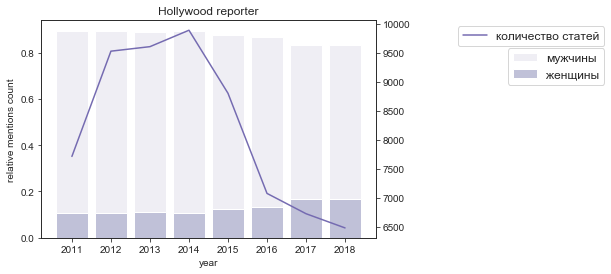

In [136]:
ax = sns.barplot(x='year_male', y='male_year_relative', data = hwr_year, color = '#efedf5',label='мужчины')
sns.barplot(x='year_male', y='fem_year_relative', data = hwr_year, color = '#bcbddc', label='женщины')
ax.set(xlabel='year', ylabel='relative mentions count')
ax.set_title('Hollywood reporter')
ax.legend(bbox_to_anchor=(1.7, 0.9),  prop={'size': 12})
ax1 = ax.twinx() 
#ax2 = plt.twinx()
ax1.plot('total', data = hwr_year, color = '#756bb1', label = 'количество статей')
ax1.legend(bbox_to_anchor=(1.7, 1),  prop={'size': 12})


#plt.tight_layout()
plt.savefig(f'hwr_mentions_year_barchart_relative.png', dpi=300, format='png')
plt.show()

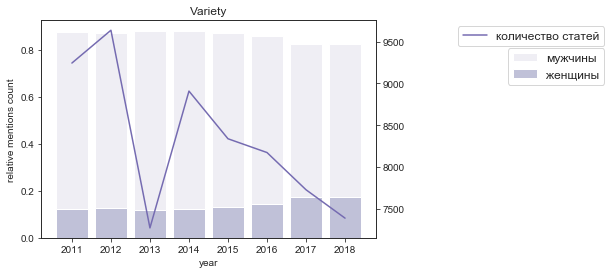

In [135]:
ax = sns.barplot(x='year_male', y='male_year_relative', data = variety_year, color = '#efedf5', label='мужчины')
sns.barplot(x='year_male', y='fem_year_relative', data = variety_year, color = '#bcbddc', label='женщины')
ax.set(xlabel='year', ylabel='relative mentions count')
ax.set_title('Variety')
ax.legend(bbox_to_anchor=(1.7, 0.9),  prop={'size': 12})
ax1 = ax.twinx() 
#ax2 = plt.twinx()
ax1.plot('total', data = variety_year, color = '#756bb1', label = 'количество статей')
ax1.legend(bbox_to_anchor=(1.7, 1),  prop={'size': 12})


#plt.tight_layout()
plt.savefig(f'variety_mentions_year_barchart_relative.png', dpi=300, format='png')
plt.show()

## Mentions per month (Lollipop charts)

In [95]:
cut_deadline_month = deadline_month.loc[deadline_month['year_male']>=2011]
cut_hwr_month = hwr_month.loc[hwr_month['year_male']>=2011]
cut_variety_month = variety_month.loc[variety_month['year_male']>=2011]

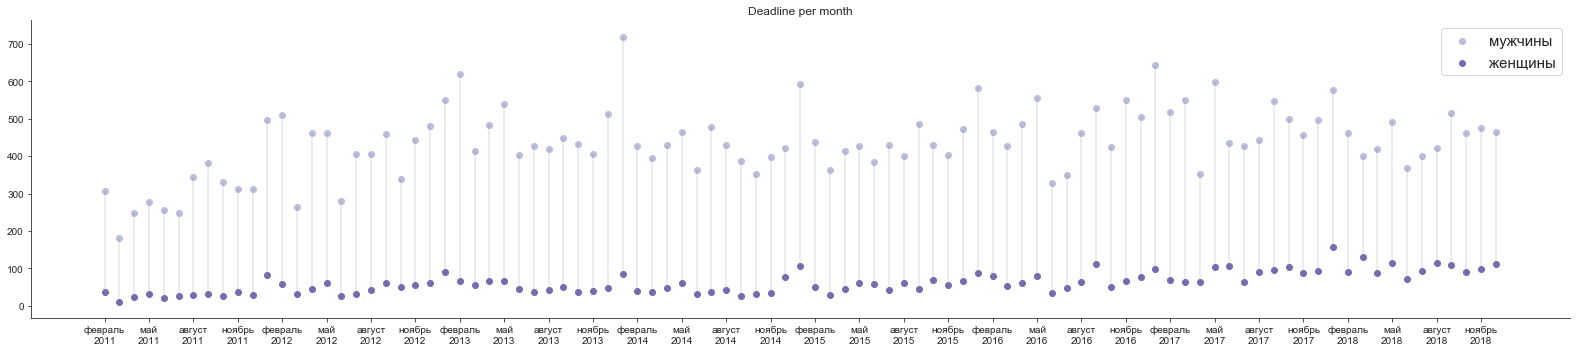

In [132]:
# deadline mentions per month
sns.set_style('ticks')
plt.figure(figsize=(22,5))
plt.vlines(x='date', ymin='count_female', ymax='count_male',data = cut_deadline_month, color='grey', alpha=0.2)
plt.scatter(x='date', y = 'count_male', data = cut_deadline_month, color='#bcbddc', alpha=1, label='мужчины')
plt.scatter(x='date', y = 'count_female', data = cut_deadline_month, color='#756bb1', alpha=1 , label='женщины')
plt.title('Deadline per month')
plt.legend(prop={'size': 15})
plt.xticks(np.arange(0, len(cut_deadline_month['date'])-1, step=3))

plt.tight_layout()
sns.despine()
plt.savefig('mentions_per_month_lollipopchart_deadline.png', dpi=300, format='png')
plt.show()

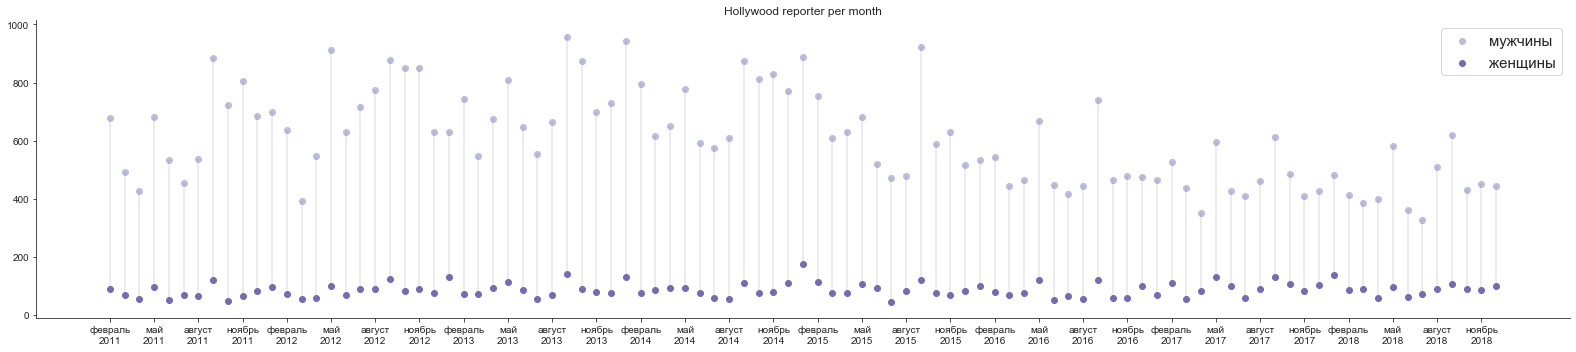

In [133]:
# hwr mentions per month
sns.set_style('ticks')
plt.figure(figsize=(22,5))
plt.vlines(x='date', ymin='count_female', ymax='count_male',data = cut_hwr_month, color='grey', alpha=0.2)
plt.scatter(x='date', y = 'count_male', data = cut_hwr_month, color='#bcbddc', alpha=1, label='мужчины')
plt.scatter(x='date', y = 'count_female', data = cut_hwr_month, color='#756bb1', alpha=1 , label='женщины')
plt.title('Hollywood reporter per month')
plt.legend(prop={'size': 15})
plt.xticks(np.arange(0, len(cut_hwr_month['date'])-1, step=3))

plt.tight_layout()
sns.despine()
plt.savefig('mentions_per_month_lollipopchart_hwr.png', dpi=300, format='png')
plt.show()

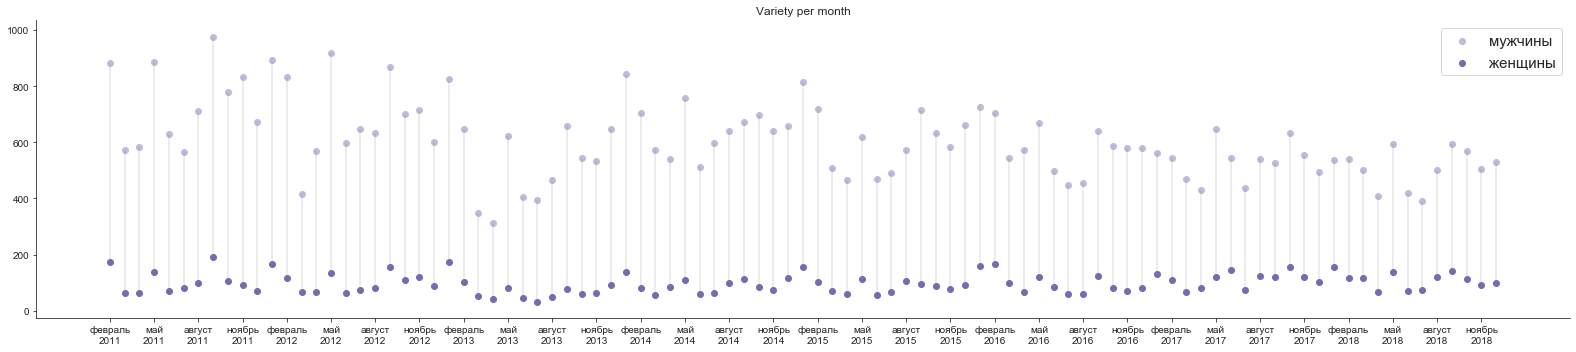

In [134]:
# variety mentions per month
sns.set_style('ticks')
plt.figure(figsize=(22,5))
plt.vlines(x='date', ymin='count_female', ymax='count_male',data = cut_variety_month, color='grey', alpha=0.2)
plt.scatter(x='date', y = 'count_male', data = cut_variety_month, color='#bcbddc', alpha=1,label='мужчины')
plt.scatter(x='date', y = 'count_female', data = cut_variety_month, color='#756bb1', alpha=1 , label='женщины')
plt.title('Variety per month')
plt.legend(prop={'size': 15})
plt.xticks(np.arange(0, len(cut_variety_month['date'])-1, step=3))

plt.tight_layout()
sns.despine()
plt.savefig('mentions_per_month_lollipopchart_variety.png', dpi=300, format='png')
plt.show()

## Google trends

In [109]:
path_google_trends = f'../../data/google_trends'
trend = pd.read_csv(f'{path_google_trends}/female_director_2009_2019.csv', sep = ',',\
                               header = 1, names = ['date', 'count'])     

In [120]:
trend['month'] = trend['date'].apply(lambda x: month[int(x.split('-')[1])])
trend['year'] = trend['date'].apply(lambda x: x.split('-')[0])
trend['date'] = trend.apply(lambda x: x[2]+'\n'+x[3], axis = 1)

In [121]:
trend.head()

,date,count,month,year
0,январь\n2009,35,январь,2009
1,февраль\n2009,35,февраль,2009
2,март\n2009,41,март,2009
3,апрель\n2009,31,апрель,2009
4,май\n2009,21,май,2009


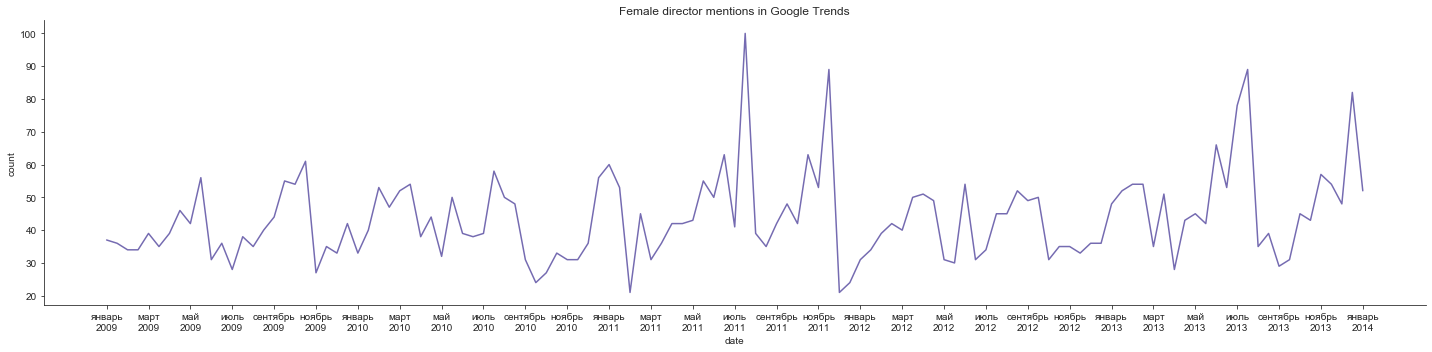

In [131]:
plt.figure(figsize=(20,5))

ax = sns.lineplot(x='date', y='count', data = trend, color = '#756bb1')
ax.set(xlabel='date', ylabel='count')
plt.title('Female director mentions in Google Trends')
#plt.legend(('female'))
plt.xticks(np.arange(0, len(trend['date'].tolist()), 4), trend['date'][0::2].tolist())
#plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'google_trends_female.png', dpi=300, format='png')
plt.show()

## Other

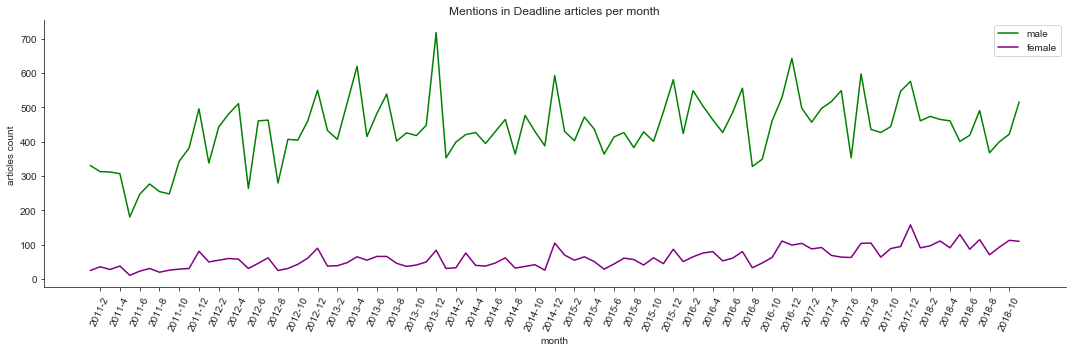

In [48]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_male', data = cut_deadline_month, color = 'green')
ax = sns.lineplot(x='date', y='count_female', data = cut_deadline_month, color = 'purple')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Deadline articles per month')
plt.legend(('male', 'female'))
plt.xticks(np.arange(1, len(cut_deadline_month['date'].tolist()), 2), cut_deadline_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'deadline_mentions_per_month_male_female.png', dpi=300, format='png')
plt.show()

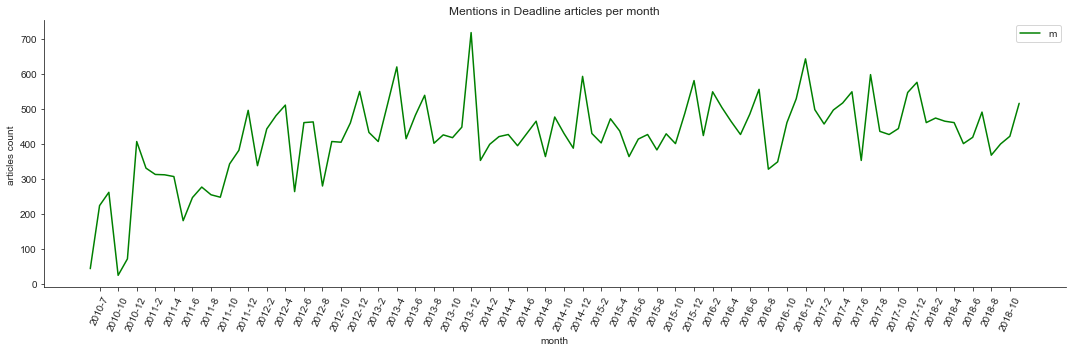

In [35]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_male', data = cut_deadline_month, color = 'green')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Deadline articles per month')
plt.legend(('male'))
plt.xticks(np.arange(1, len(cut_deadline_month['date'].tolist()), 2), cut_deadline_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'deadline_mentions_per_month_male.png', dpi=300, format='png')
plt.show()

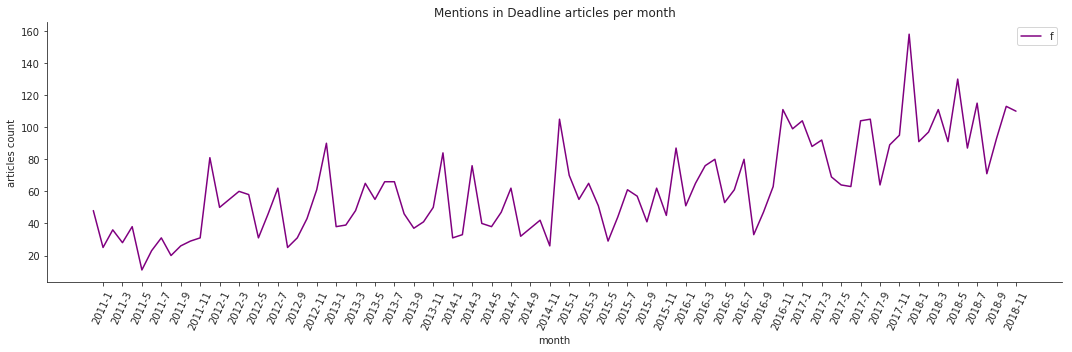

In [93]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_female', data = cut_deadline_month, color = 'purple')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Deadline articles per month')
plt.legend(('female'))
plt.xticks(np.arange(1, len(cut_deadline_month['date'].tolist()), 2), cut_deadline_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'deadline_mentions_per_month_female.png', dpi=300, format='png')
plt.show()

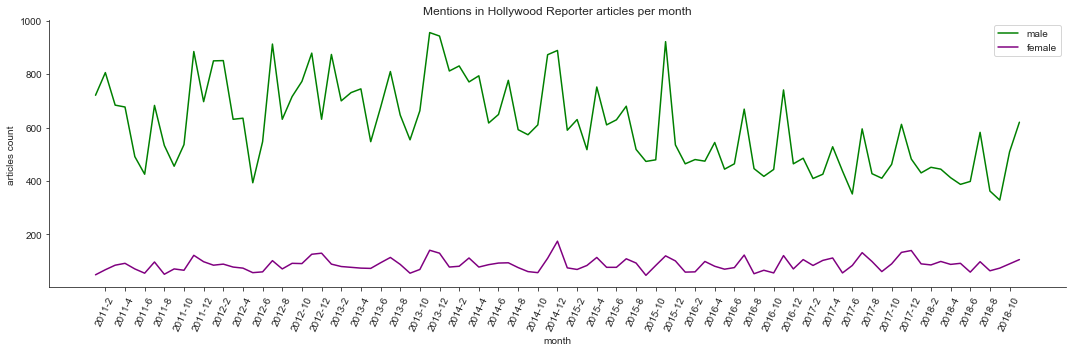

In [49]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_male', data = cut_hwr_month, color = 'green')
ax = sns.lineplot(x='date', y='count_female', data = cut_hwr_month, color = 'purple')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Hollywood Reporter articles per month')
plt.legend(('male', 'female'))
plt.xticks(np.arange(1, len(cut_hwr_month['date'].tolist()), 2), cut_hwr_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'hwr_mentions_per_month_male_female.png', dpi=300, format='png')
plt.show()

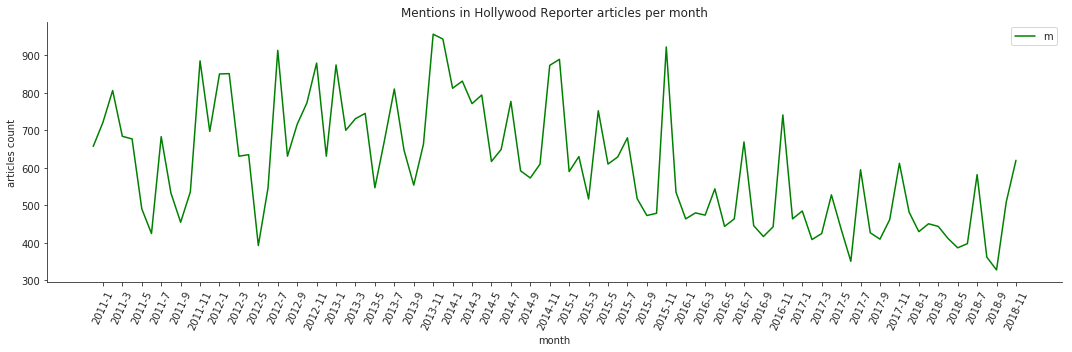

In [95]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_male', data = cut_hwr_month, color = 'green')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Hollywood Reporter articles per month')
plt.legend(('male'))
plt.xticks(np.arange(1, len(cut_hwr_month['date'].tolist()), 2), cut_hwr_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'hwr_mentions_per_month_male.png', dpi=300, format='png')
plt.show()

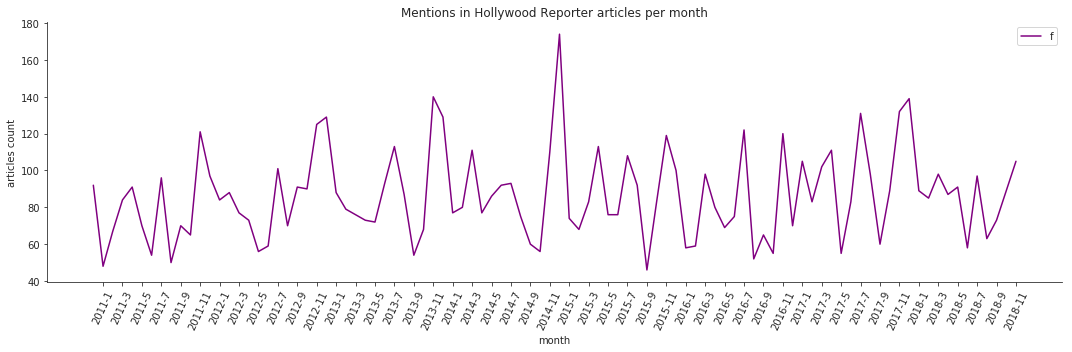

In [96]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_female', data = cut_hwr_month, color = 'purple')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Hollywood Reporter articles per month')
plt.legend(('female'))
plt.xticks(np.arange(1, len(cut_hwr_month['date'].tolist()), 2), cut_hwr_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'hwr_mentions_per_month_female.png', dpi=300, format='png')
plt.show()

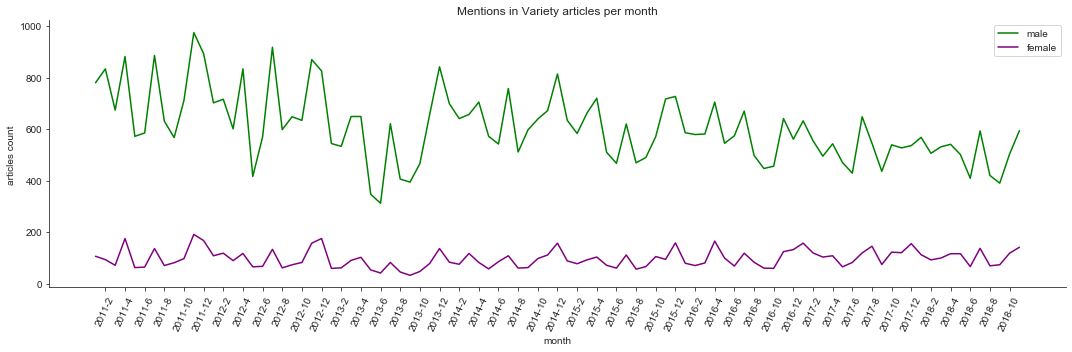

In [50]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_male', data = cut_variety_month, color = 'green')
ax = sns.lineplot(x='date', y='count_female', data = cut_variety_month, color = 'purple')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Variety articles per month')
plt.legend(('male', 'female'))
plt.xticks(np.arange(1, len(cut_variety_month['date'].tolist()), 2), cut_variety_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'variety_mentions_per_month_male_female.png', dpi=300, format='png')
plt.show()

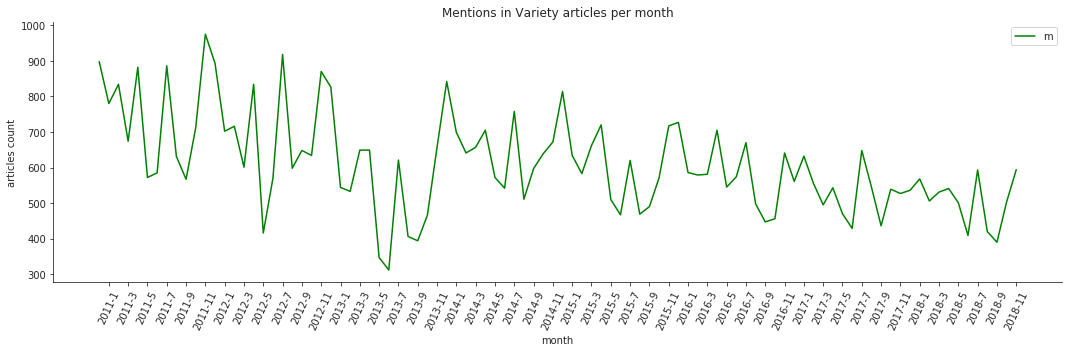

In [98]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_male', data = cut_variety_month, color = 'green')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Variety articles per month')
plt.legend(('male'))
plt.xticks(np.arange(1, len(cut_variety_month['date'].tolist()), 2), cut_variety_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'variety_mentions_per_month_male.png', dpi=300, format='png')
plt.show()

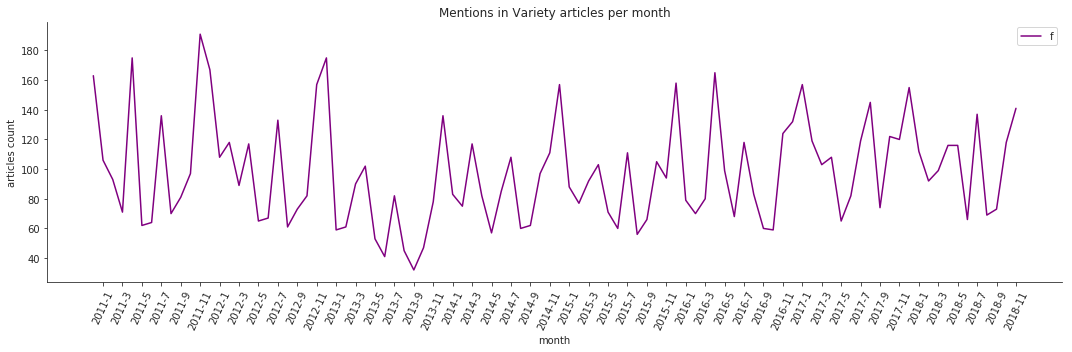

In [99]:
plt.figure(figsize=(15,5))

ax = sns.lineplot(x='date', y='count_female', data = cut_variety_month, color = 'purple')
ax.set(xlabel='month', ylabel='articles count')
plt.title('Mentions in Variety articles per month')
plt.legend(('female'))
plt.xticks(np.arange(1, len(cut_variety_month['date'].tolist()), 2), cut_variety_month['date'][0::2].tolist())
plt.xticks(rotation=65)

plt.tight_layout()
sns.despine()
plt.savefig(f'variety_mentions_per_month_female.png', dpi=300, format='png')
plt.show()